In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from seaborn import countplot

**Сделать имитатор бросания 2 костей (20 000 бросков).**

In [2]:
dice = np.random.choice([1,2,3,4,5,6], (20000, 2))
print(dice)

[[4 4]
 [6 3]
 [3 4]
 ...
 [2 2]
 [3 1]
 [1 1]]


**Проверить вероятности выпадения цифр на каждой кости.**

In [3]:
dice_count_sides_first = Counter(dice[:, 0])
print("Число выпадений каждой из сторон на первой кости:")    
print(dice_count_sides_first)

print("Вероятности выпадений цифр на первой кости:")
print({key: value/20000.0 for key, value in dice_count_sides_first.items()})

dice_count_sides_second = Counter(dice[:, 1])
print("Число выпадений каждой из сторон на второй кости:")    
print(dice_count_sides_second)

print("Вероятности выпадений цифр на второй кости:")
print({key: value/20000.0 for key, value in dice_count_sides_second.items()})

Число выпадений каждой из сторон на первой кости:
Counter({2: 3425, 1: 3402, 5: 3395, 3: 3277, 6: 3271, 4: 3230})
Вероятности выпадений цифр на первой кости:
{4: 0.1615, 6: 0.16355, 3: 0.16385, 5: 0.16975, 1: 0.1701, 2: 0.17125}
Число выпадений каждой из сторон на второй кости:
Counter({3: 3358, 4: 3357, 5: 3350, 2: 3348, 1: 3300, 6: 3287})
Вероятности выпадений цифр на второй кости:
{4: 0.16785, 3: 0.1679, 6: 0.16435, 2: 0.1674, 1: 0.165, 5: 0.1675}


**Построить гистограмму выпадения сумм цифр на костях.**

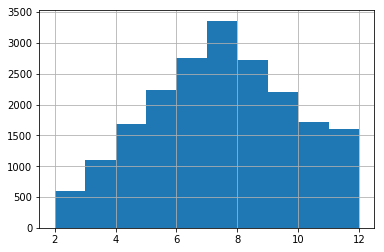

In [4]:
pd.Series(np.array([sum(row) for row in dice])).hist();

**Сделать 10 000 серий бросков. В каждой серии определить количество бросков до выпадения суммы на костях числа 9.**

In [5]:
%%time
ten = []
for i in range(10000):
    ten.append([[np.random.randint(1, 6), np.random.randint(1, 6)]])
    while sum(ten[i][-1]) != 9:
        ten[i].append([np.random.randint(1, 6), np.random.randint(1, 6)])

CPU times: user 3.22 s, sys: 31.4 ms, total: 3.25 s
Wall time: 3.27 s


In [6]:
length_throws = [len(row) for row in ten]

**Визуализировать результат.**

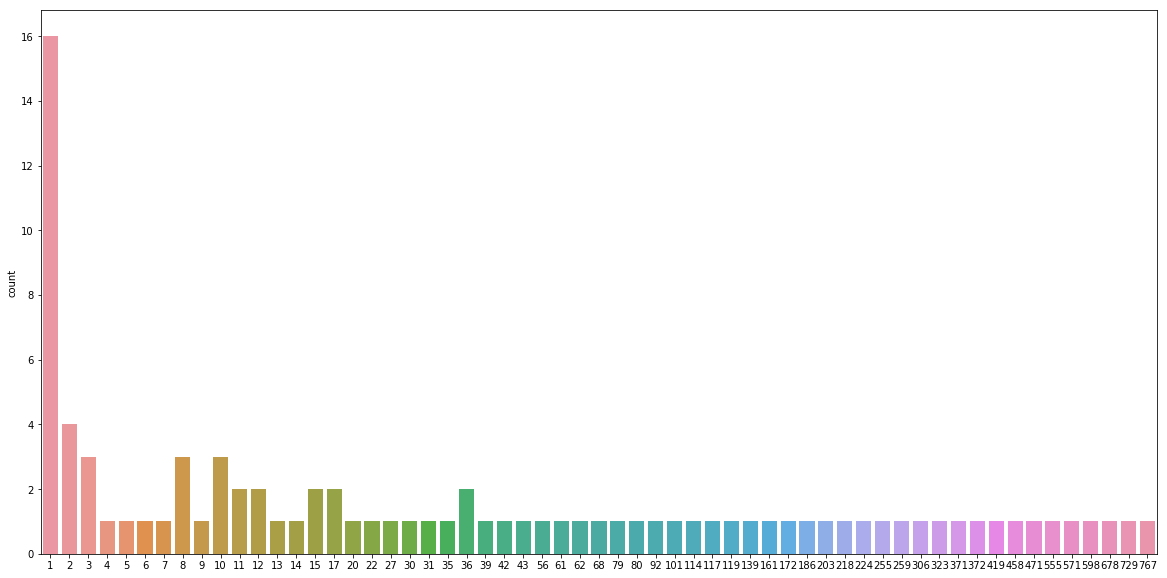

In [7]:
data=pd.Series(Counter(length_throws))
fig = plt.figure(figsize=(20, 10))
countplot(x = data.index, data=data);

**Сгенерировать последовательность случайных чисел в диапазоне от 0 до 12, с нормальным распределением.**

In [8]:
def get_truncated(mu, sigma, low, high):
    from scipy.stats import truncnorm
    return truncnorm(
        (low - mu) / sigma, (high - mu) / sigma, loc=mu, scale=sigma)

In [9]:
normaly_range = get_truncated(6, 3, 0, 12)

In [10]:
normal_sample = normaly_range.rvs(3000)

**Визуализировать результат.**

In [11]:
one = normaly_range.rvs(50)
two = normaly_range.rvs(100)
three = normaly_range.rvs(1000)
four = normaly_range.rvs(3000)

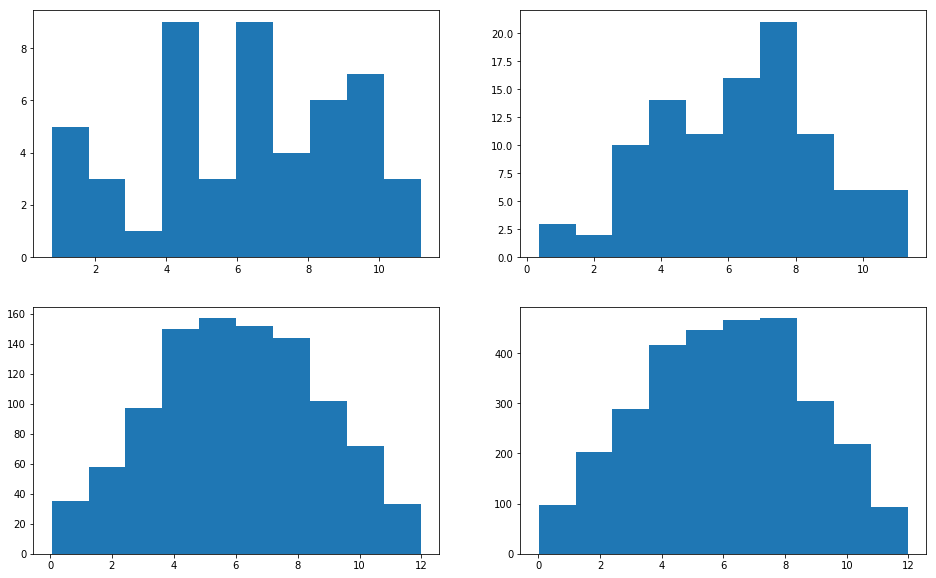

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
ax[0, 0].hist(one);
ax[0, 1].hist(two);
ax[1, 0].hist(three);
ax[1, 1].hist(four);

**Сгенерировать 2 случайные последовательности. Получить из них третью, каждый элемент которой - сумма соответсвующих элементов первых двух последовательностей.**

In [13]:
first_sequence = np.random.random_sample((1000,))
second_sequence = np.random.random_sample((1000,))
third_sequence = np.array([a + b for a, b in zip(first_sequence, second_sequence)])

**Визуализировать результат.**

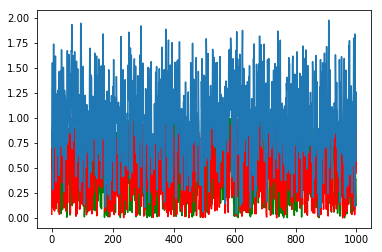

In [14]:
plt.plot(first_sequence, color="green");
plt.plot(second_sequence, color="red");
plt.plot(third_sequence);

Плохо видно какие значения принимает третья последовательность. Посмотрим для 10 элементов.

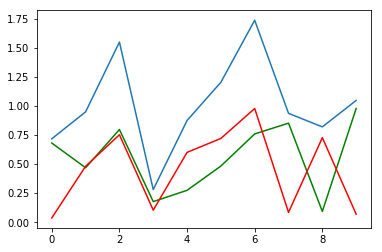

In [15]:
plt.plot(first_sequence[:10], color="green");
plt.plot(second_sequence[:10], color="red");
plt.plot(third_sequence[:10]);

**Проверить, что полученное распределение соответствует нормальному распределению.**

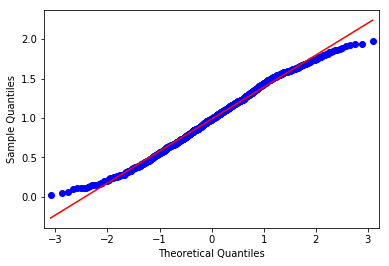

In [16]:
qqplot(third_sequence, line='s');

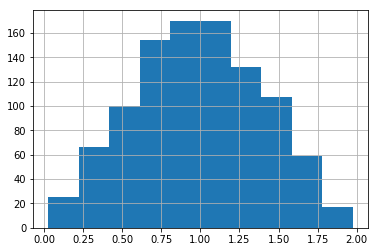

In [17]:
pd.Series(third_sequence).hist();

Если посмотреть на графики, то распределение у этой величины почти нормальное. Но сделаем ещё дополнительные проверки.

In [18]:
stats.kstest(third_sequence, 'norm')

KstestResult(statistic=0.5750100031280836, pvalue=0.0)

In [19]:
stats.shapiro(third_sequence)

(0.9914714694023132, 1.5464715033886023e-05)

Если посмотреть на результаты, то можно сказать, что респределение не есть нормальным.

**Из двух предыдущих последовательностей получить четвертую, каждый элемент которой равен отношению соответствующих элементов из первой последовательности к элементу второй последовательности.**

In [20]:
four_sequence = np.array([a / b for a, b in zip(first_sequence, second_sequence)])

**Визуализировать результат.**

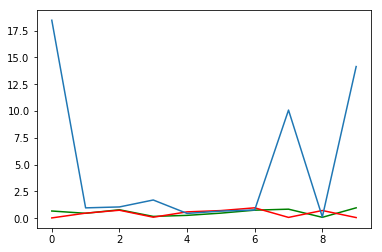

In [21]:
plt.plot(first_sequence[:10], color="green");
plt.plot(second_sequence[:10], color="red");
plt.plot(four_sequence[:10]);

**Проверить подчиняется ли получення последователность нормальному распределению.**

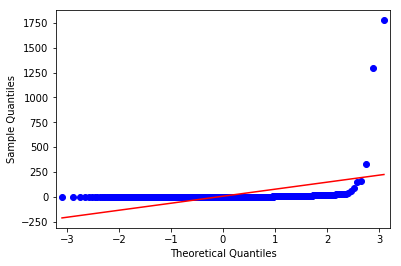

In [22]:
qqplot(four_sequence, line='s');

In [23]:
stats.shapiro(four_sequence)

(0.04411035776138306, 0.0)

В этом случае сразу видно, что распрееление не есть нормальным.

**Сгенерировать две новые случайные последовательности с разным RandomState.**

In [24]:
first_sequence = np.random.RandomState(145)
first_sequence = list(first_sequence.random_sample((1000,)))
second_sequence = np.random.RandomState(14435)
second_sequence = list(second_sequence.random_sample((1000,)))

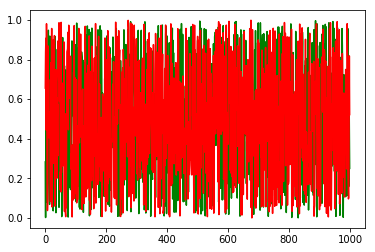

In [25]:
plt.plot(first_sequence, color="green");
plt.plot(second_sequence, color="red");

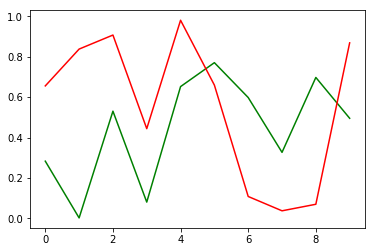

In [26]:
plt.plot(first_sequence[:10], color="green");
plt.plot(second_sequence[:10], color="red");

In [27]:
correlation, p_value = stats.pearsonr(first_sequence, second_sequence)
print(f'Correlation between this samples: {correlation}.')

Correlation between this samples: -0.008354329115046114.
